<h2 style="color : red">Linear Regression from scratch using python</h2>

<h4>Sample Example on Iris Dataset</h4>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

<h2>Linear line equation</h2>

<img src="linear_equation.png" >

<center><h3><b>Binary Cross Entropy</b></h3>
<img src="mse.png" height = "400" width = "700"></center>

In [4]:
class LinearRegression:
    '''
    Implementation of Linear Regression from scratch using python.
    Attributes:
    learning_rate : This attribute is used for gradient descent as learning rate to train the model.
    iterations : Used for training the models, it's also known as epochs.
    formula : f(x) = M.X + C
    X : This variable consists of independent variables data from the dataset.
    y : This consists of dependent variable data from the dataset.
    rows : Number of rows in the dataset.
    cols : Number of columns in the dataset.
    weights : Slope i.e: "M" in formula.
    bias : Intercept i.e: "C" in formula.
    losses : A list to keep track of the loss during training.
    '''
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.losses = []

    # Passing dataset to model
    def fit(self, X, y):
        # Number of rows and columns in the dataset.
        self.rows, self.cols = X.shape
        # Initializing weights to zero to train model from origin
        self.weights = np.zeros(self.cols)
        # Initializing bias "C" in formula
        self.bias = 0

        self.X = X
        self.y = y

        # Implementing gradient descent
        for i in range(self.iterations):
            self.gradient_decent()
            loss = self.calculate_loss()
            self.losses.append(loss)
            if i % 100 == 0:  
                print(f"Iteration {i}: Weights: {self.weights}, Bias: {self.bias}, Loss: {loss}")
            if i % 50 == 0:
                self.plot_best_fit_line(i)

        return self
     
    def gradient_decent(self):
        Y_pred = self.predict(self.X)
        # Implementing derivatives to weight and bias (converging theorem)
        derivative_weight = - (2 * (self.X.T).dot(self.y - Y_pred)) / self.rows
        derivative_bias = - 2 * np.sum(self.y - Y_pred) / self.rows

        # Updating weights
        self.weights = self.weights - self.learning_rate * derivative_weight
        self.bias = self.bias - self.learning_rate * derivative_bias

        return self
    
    # Implementing 'f(x)' line formula 
    def predict(self, X):
        return X.dot(self.weights) + self.bias
    
    # Calculate mean squared error loss
    def calculate_loss(self):
        Y_pred = self.predict(self.X)
        loss = np.mean((self.y - Y_pred) ** 2)
        return loss

    def plot_best_fit_line(self, iteration):
        plt.figure(figsize=(8, 6))
        plt.scatter(self.X, self.y, color='blue', label='Data points')
        Y_pred = self.predict(self.X)
        plt.plot(self.X, Y_pred, color='red', label='Best fit line')
        plt.title(f'Best Fit Line at Iteration {iteration}')
        plt.xlabel('Petal length (standardized)')
        plt.ylabel('Petal width')
        plt.legend()
        plt.show()

<h4>Using Iris dataset for Testing</h4>

In [5]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [6]:
# Using required features
X = df[['petal length (cm)']].values
y = df['petal width (cm)'].values

In [7]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"""
X_train: {len(X_train)}
X_test: {len(X_test)}
y_train: {len(y_train)}
y_test: {len(y_test)}
""")



X_train: 120
X_test: 30
y_train: 120
y_test: 30



Iteration 0: Weights: [0.01462964], Bias: 0.023986666666666673, Loss: 1.937384078777455


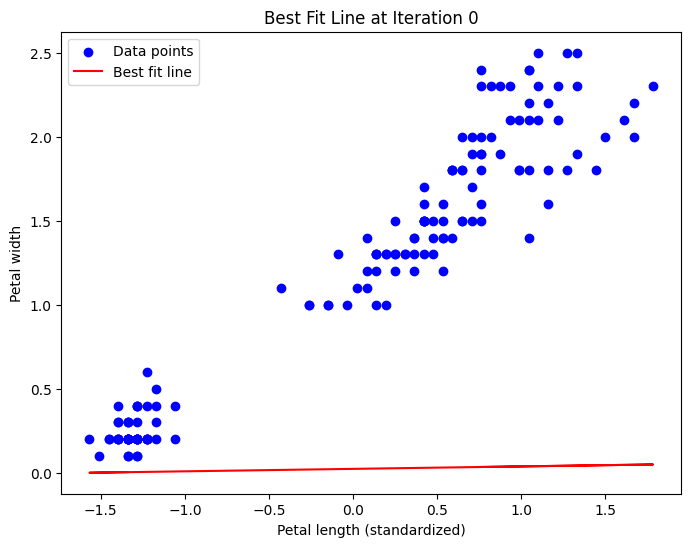

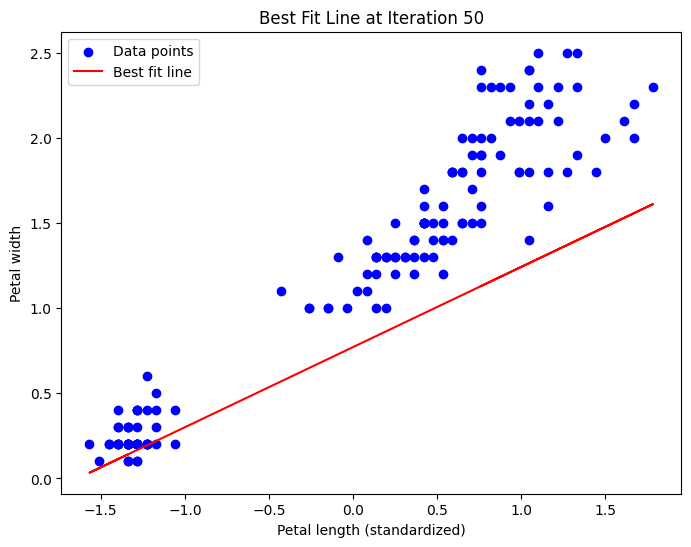

Iteration 100: Weights: [0.63641316], Bias: 1.043459380377622, Loss: 0.07540203933933814


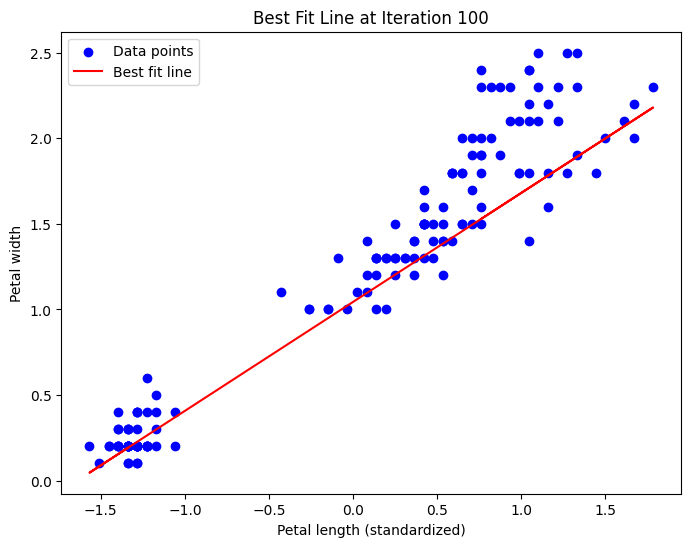

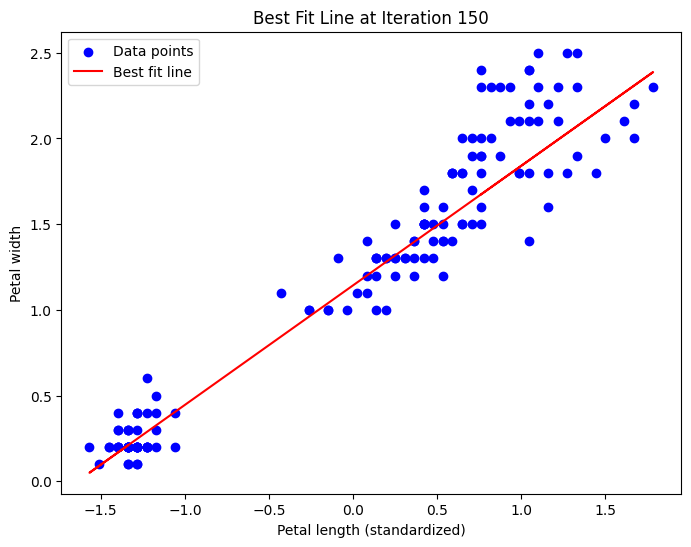

Iteration 200: Weights: [0.71887381], Bias: 1.1786613989167876, Loss: 0.042653598648888055


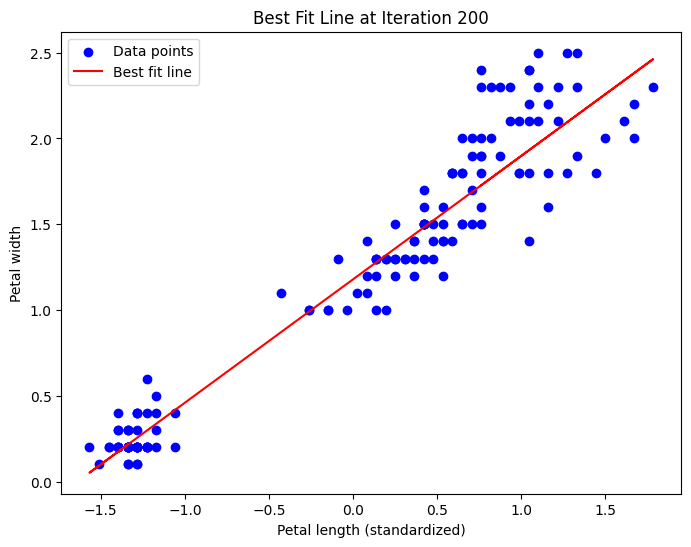

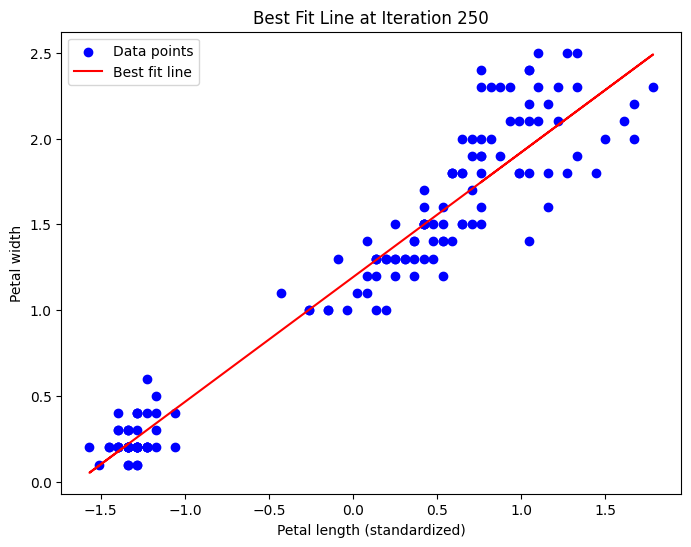

Iteration 300: Weights: [0.72980971], Bias: 1.1965918305715253, Loss: 0.04207762082260379


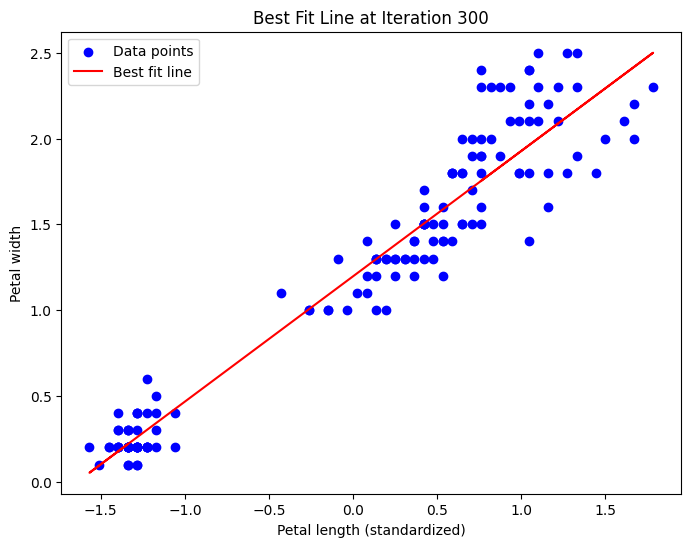

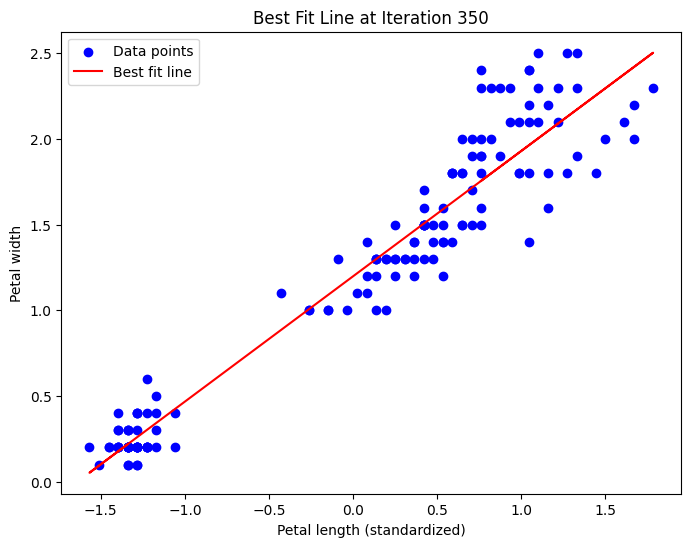

Iteration 400: Weights: [0.73126002], Bias: 1.198969756454578, Loss: 0.042067490555349016


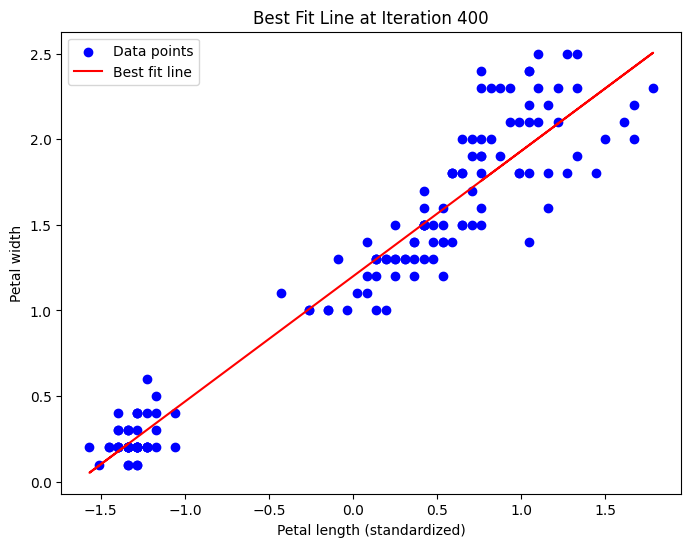

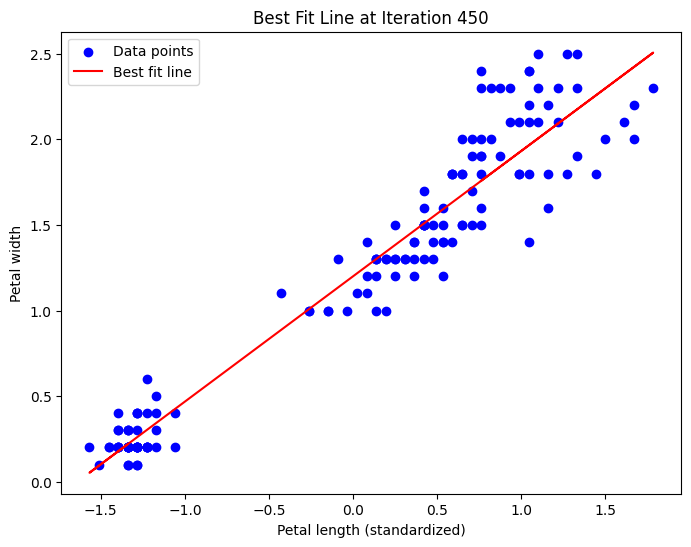

Iteration 500: Weights: [0.73145236], Bias: 1.1992851159291393, Loss: 0.04206731238474943


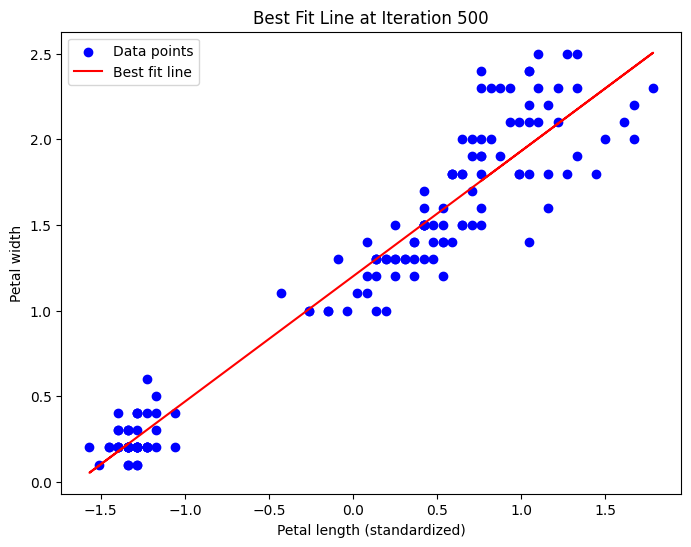

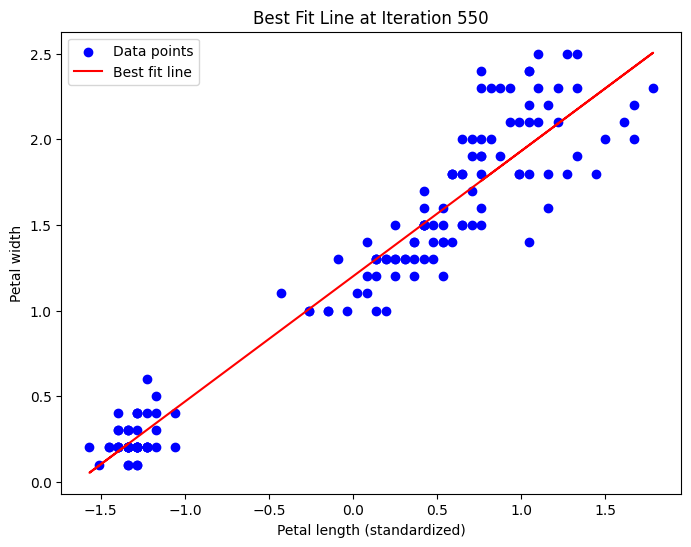

Iteration 600: Weights: [0.73147787], Bias: 1.1993269387626029, Loss: 0.042067309251094434


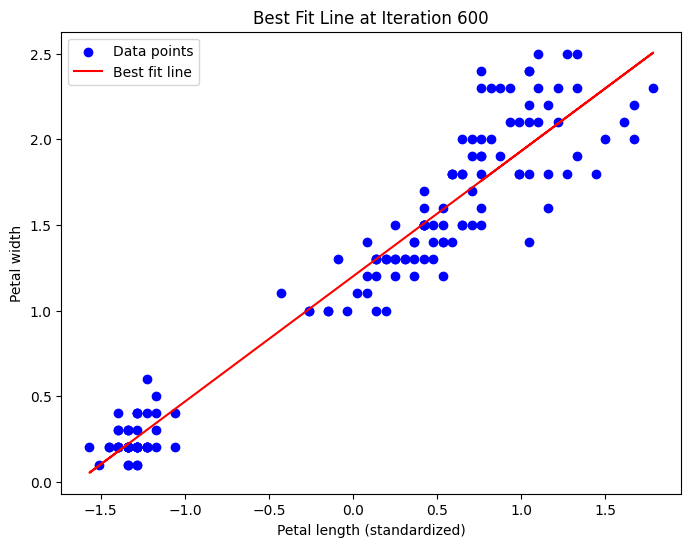

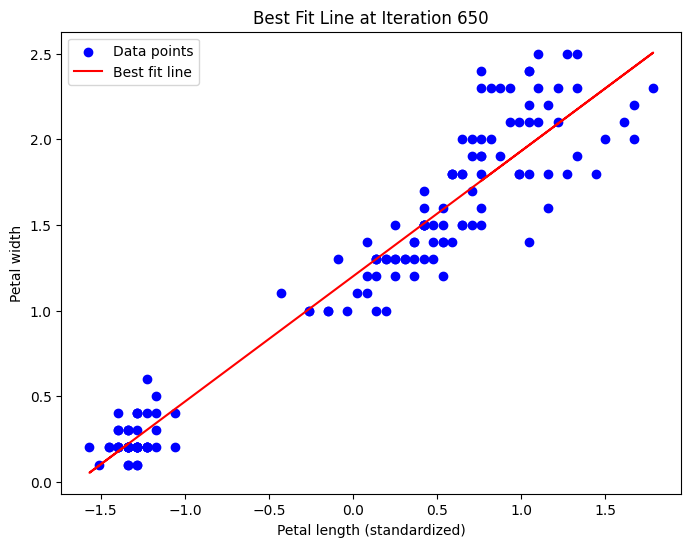

Iteration 700: Weights: [0.73148125], Bias: 1.199332485288203, Loss: 0.04206730919597988


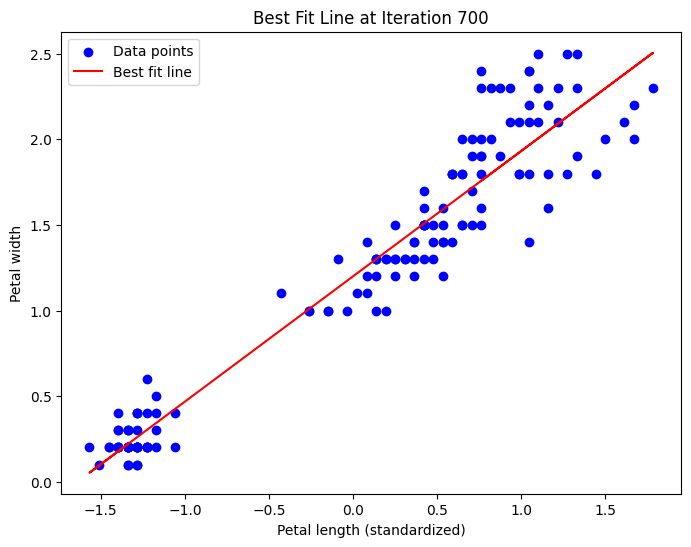

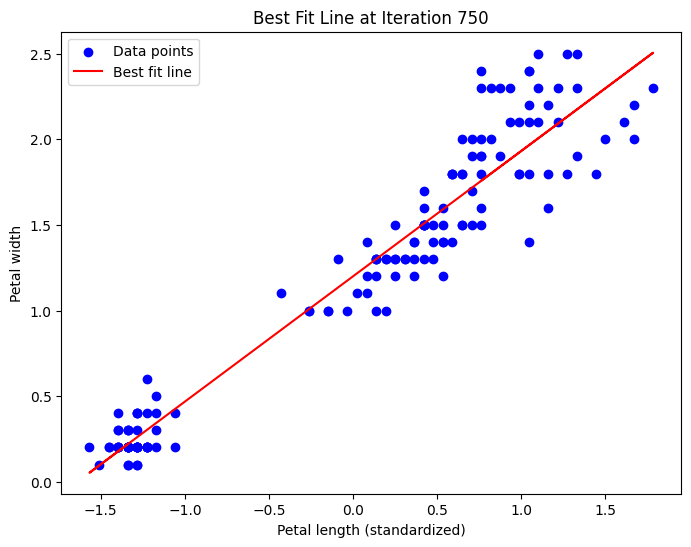

Iteration 800: Weights: [0.7314817], Bias: 1.199333220865965, Loss: 0.042067309195010526


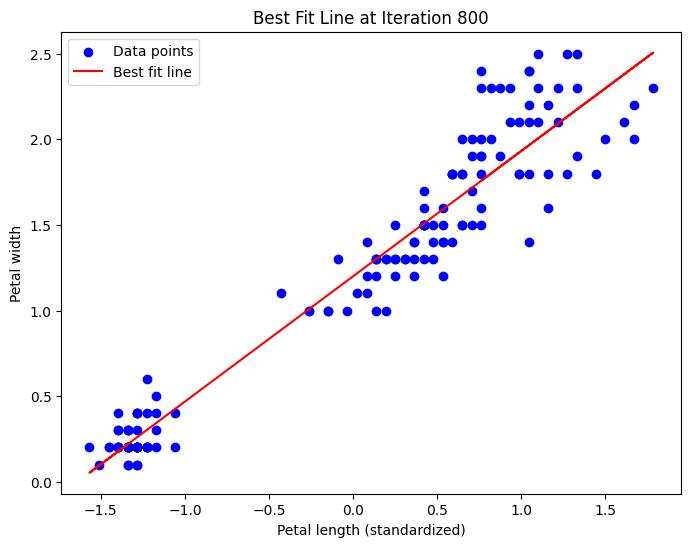

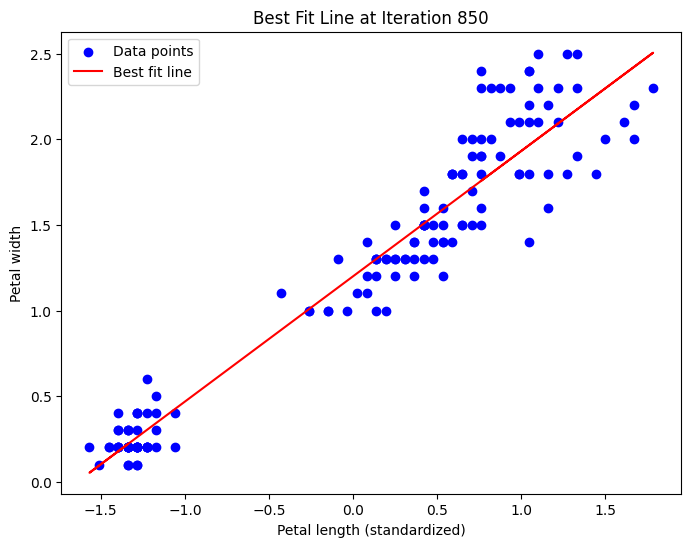

Iteration 900: Weights: [0.73148176], Bias: 1.1993333184179609, Loss: 0.0420673091949935


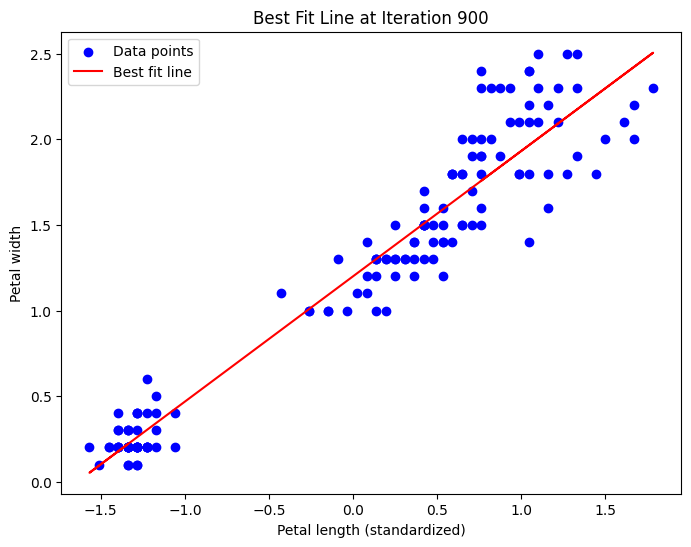

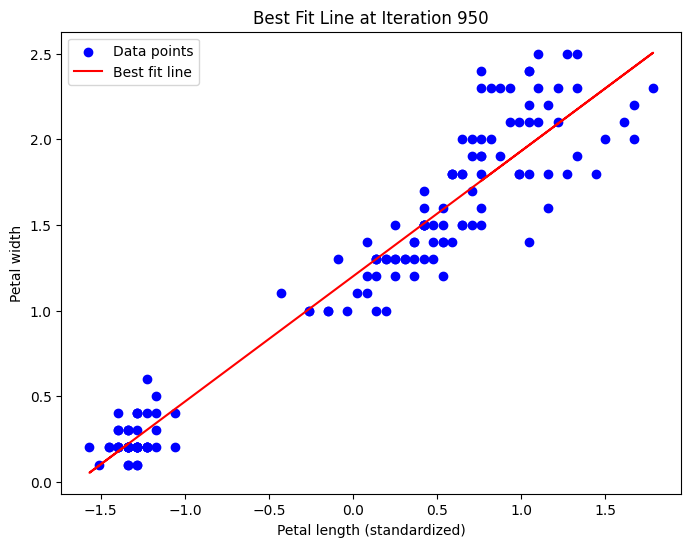

In [9]:
model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X, y)

In [10]:
y_preds = model.predict(X_test)
np.ravel([np.argmax(i) for i in y_preds])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

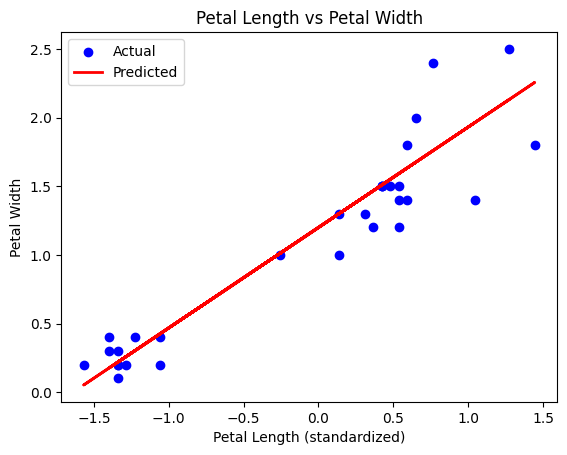

In [11]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_preds, color='red', linewidth=2, label='Predicted')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [12]:
print(model.__doc__)


    Implementation of Linear Regression from scratch using python.
    Attributes:
    learning_rate : This attribute is used for gradient descent as learning rate to train the model.
    iterations : Used for training the models, it's also known as epochs.
    formula : f(x) = M.X + C
    X : This variable consists of independent variables data from the dataset.
    y : This consists of dependent variable data from the dataset.
    rows : Number of rows in the dataset.
    cols : Number of columns in the dataset.
    weights : Slope i.e: "M" in formula.
    bias : Intercept i.e: "C" in formula.
    losses : A list to keep track of the loss during training.
    
